### Documentation:
#### Data Set:3.concertriccir2


### Data Description:
- The dataset consists of three columns and 500 rows which includes two feature columns and one label column.
- Features columns are in the form of float and continuous values ranges from [-3.950019 to 6.712027] and [-3.935098 to 7.848278] and the means are at [-0.010872 and -0.019289].
- Whereas label is in the form discreate numerical float values that includes [0.0 and 1.o]. 50% of the data consists of 0 and rest consists of 1 as labels.
- There are zero duplicates and no null values consists in the dataset.
- Pattern that is formed by the input features is two spirals shape. That means one sprial consists of labels as 0 and the other consists of 1.

### Importing Libraries: The required libraries are imported at the beginning of the code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading the Dataset:
The code reads a CSV file using Pandas, assuming the file is located at"C:\\Users\\dell\\Downloads\\Deep Learning data\\3.concertriccir2.csv". The dataset is stored in the DataFrame df.

In [2]:
df = pd.read_csv("C:\\Users\\dell\\Downloads\\Deep Learning data\\3.concertriccir2.csv",header = None)
df.head()

,0,1,2
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


#### Gives the dimensions of the dataset (number of rows, number of columns).


In [51]:
df.shape

(500, 3)

In [52]:
df[[0,1]]

,0,1
0,0.700335,-0.247068
1,-3.950019,2.740080
2,0.150222,-2.157638
3,-1.672050,-0.941519
4,2.560483,-1.846577
...,...,...
495,2.177895,2.984489
496,1.778905,2.869205
497,0.894180,3.069959
498,0.849439,3.875435


#### Provides information about the dataset, including the data types of each column and the number of non-null values.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   2       500 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


#### Generates descriptive statistics of the dataset, such as count, mean, standard deviation, minimum, and maximum values for each numerical column. 

In [6]:
df.describe()

,0,1,2
count,500.000000,500.000000,500.000000
mean,1.883707,1.869874,0.500000
std,1.931275,1.986852,0.500501
min,-3.950019,-3.935098,0.000000
25%,0.403585,0.426457,0.000000
50%,2.191547,2.109658,0.500000
75%,3.349001,3.388552,1.000000
max,6.712027,7.848278,1.000000


In [7]:
df.isna().sum()

0    0
1    0
2    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df[2].value_counts()

0.0    250
1.0    250
Name: 2, dtype: int64

### Data Visualization:
A scatter plot is created using Seaborn to visualize the data points, where the x-axis represents df[0], the y-axis represents df[1], and the color of the points is determined by df[2]

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

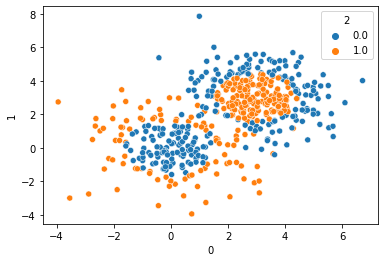

In [10]:
sns.scatterplot(df[0],df[1],hue = df[2])

### Train-Test Split:
The dataset is split into training and testing sets using the train_test_split function from scikit-learn. The features (x_train, x_test) consist of columns 0 and 1 from the DataFrame, while the target variables (y_train, y_test) correspond to column 2. The testing set size is set to 20% of the total dataset.

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[[0,1]],df[2],test_size=0.1)

### Data Preprocessing:
The features are standardized using scikit-learn's StandardScaler. The fit_transform method is applied to the training set (x_train), and the transform method is applied to the testing set (x_test).

In [12]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_trainf=std.fit_transform(x_train)
x_testf=std.transform(x_test)

### Importing necessary libraries:
- TensorFlow and Keras are libraries.
- Sequential is a linear stack of neural network layers.
- Dense represents a fully connected layer.

In [13]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

### Model Architecture:

- The code starts by creating a Sequential model, which is a linear stack of layers.
- The first layer added to the model is a Dense layer with 5 units/neurons, using the hyperbolic tangent activation function ('tanh'). It takes an input of dimension 2.
- The subsequent layers are also Dense layers with 4, 3, 2, and 1 unit(s), respectively. They all use the 'tanh' activation function.

In [38]:
model=Sequential()
model.add(Dense(5,activation="tanh",input_dim=2))

model.add(Dense(4,activation="tanh"))

model.add(Dense(3,activation="tanh"))

model.add(Dense(2,activation="tanh"))

model.add(Dense(1,activation="sigmoid"))

### Model Summary:

After defining the model architecture, the code prints a summary of the model, displaying the layers, their output shapes, and the number of parameters.

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 5)                 15        
                                                                 
 dense_12 (Dense)            (None, 4)                 24        
                                                                 
 dense_13 (Dense)            (None, 3)                 15        
                                                                 
 dense_14 (Dense)            (None, 2)                 8         
                                                                 
 dense_15 (Dense)            (None, 1)                 3         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


### Model Compilation:

- The next step is to compile the model. The chosen optimizer is 'Adam', which is a popular optimization algorithm.
- The loss function is set to 'binary_crossentropy', indicating that the model is being trained for binary classification.
- Additionally, the code specifies that the model should track and report the 'accuracy' metric during training.

In [40]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

### Model Training:

- The code then proceeds to train the model using the 'fit' function. 
- It provides the training data ('x_trainf' and 'y_train'), sets the batch size to 20, and trains for 50 epochs.
- The 'validation_split' parameter is set to 0.2, which means that 20% of the training data will be used as validation data for evaluating the model's performance on unseen examples.

In [41]:
history=model.fit(x_trainf,y_train,batch_size=20,epochs=50,validation_split=0.2)

Epoch 1/50
18/18 [==============================] - 0s 7ms/step - loss: 0.7094 - accuracy: 0.5500 - val_loss: 0.7034 - val_accuracy: 0.5556
Epoch 2/50
18/18 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.5444 - val_loss: 0.7010 - val_accuracy: 0.5556
Epoch 3/50
18/18 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.5500 - val_loss: 0.6990 - val_accuracy: 0.5556
Epoch 4/50
18/18 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.5472 - val_loss: 0.6972 - val_accuracy: 0.5556
Epoch 5/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.5472 - val_loss: 0.6955 - val_accuracy: 0.5556
Epoch 6/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5417 - val_loss: 0.6941 - val_accuracy: 0.5556
Epoch 7/50
18/18 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5444 - val_loss: 0.6925 - val_accuracy: 0.5556
Epoch 8/50
18/18 [==

### Plotting Decision Regions:

- Imports the 'plot_decision_regions' function from the 'mlxtend.plotting' module.
- It uses this function to visualize the decision regions of the trained model on the provided dataset, which consists of features stored in columns 0 and 1, and labels stored in column 2.

In [42]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

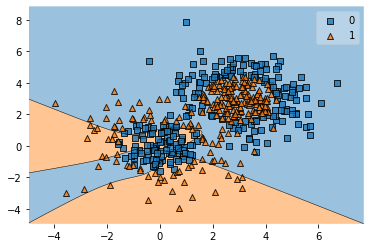

In [43]:
plot_decision_regions(df[[0,1]].values,df[2].values.astype(int),clf=model)

### Model Prediction and Evaluation:

- Next, predicts the labels for the test data ('x_testf') using the trained model.
- It applies a threshold of 0.5 to convert the predicted probabilities into binary class labels (0 or 1) and stores the results in 'y_capf'.


In [44]:
y_cap=model.predict(x_testf)

In [45]:
y_capf=np.where(y_cap>0.5,1,0)

#### compute the accuracy score of the model's predictions ('y_capf') compared to the true labels ('y_test') using the 'accuracy_score' function from sklearn.metrics.### 

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.74

### Plotting Training Metrics:

- After training, the code uses matplotlib to plot the training loss and validation loss from the 'history' object. 
- This can help visualize the model's learning progress and identify potential overfitting or underfitting.

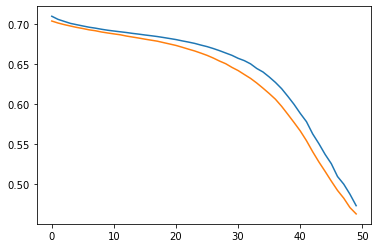

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### Plotting Decision Regions for Test Data:

Finally, plots the decision regions for the test data ('x_testf' and 'y_test') using the trained model, again utilizing the 'plot_decision_regions' function.

<AxesSubplot:>

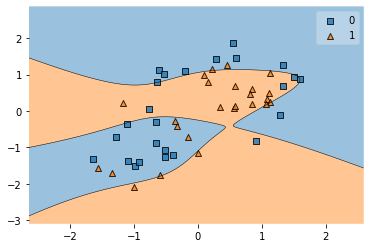

In [50]:
plot_decision_regions(x_testf,y_test.values.astype(int),clf=model)